In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [3]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## EDA

In [7]:
import seaborn as sns

In [8]:
num_col=df.select_dtypes(include=['float64','int64']).columns.to_list()
num_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [9]:
def count_plot(features):
    plt.figure(figsize=(14,10))
    for loc,feature in enumerate(features):
        plt.subplot(2,3,loc+1)
        sns.histplot(x=feature,data=df,kde=True)
    plt.show()

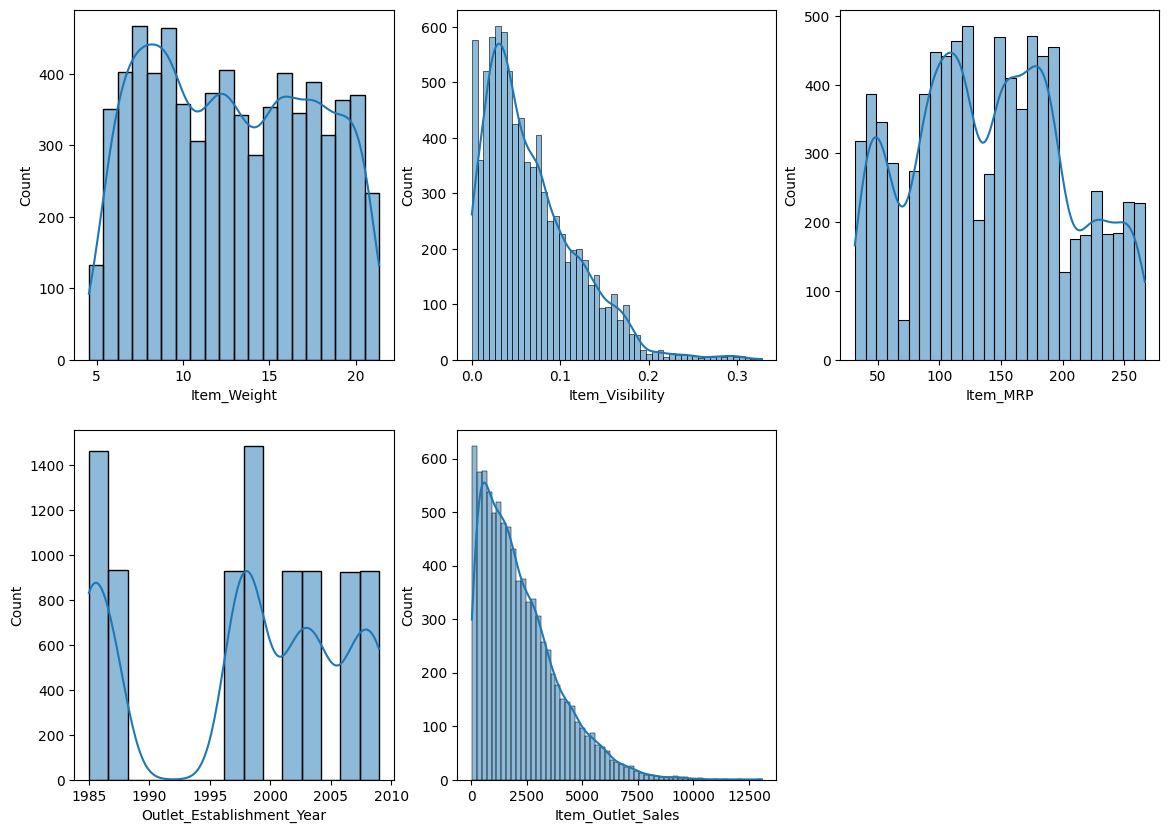

In [10]:
count_plot(num_col)

In [11]:
def b_plot(features):
    plt.figure(figsize=(14,20))
    for loc,feature in enumerate(features):
        plt.subplot(2,3,loc+1)
        sns.boxplot(y=feature,data=df)
    plt.show()

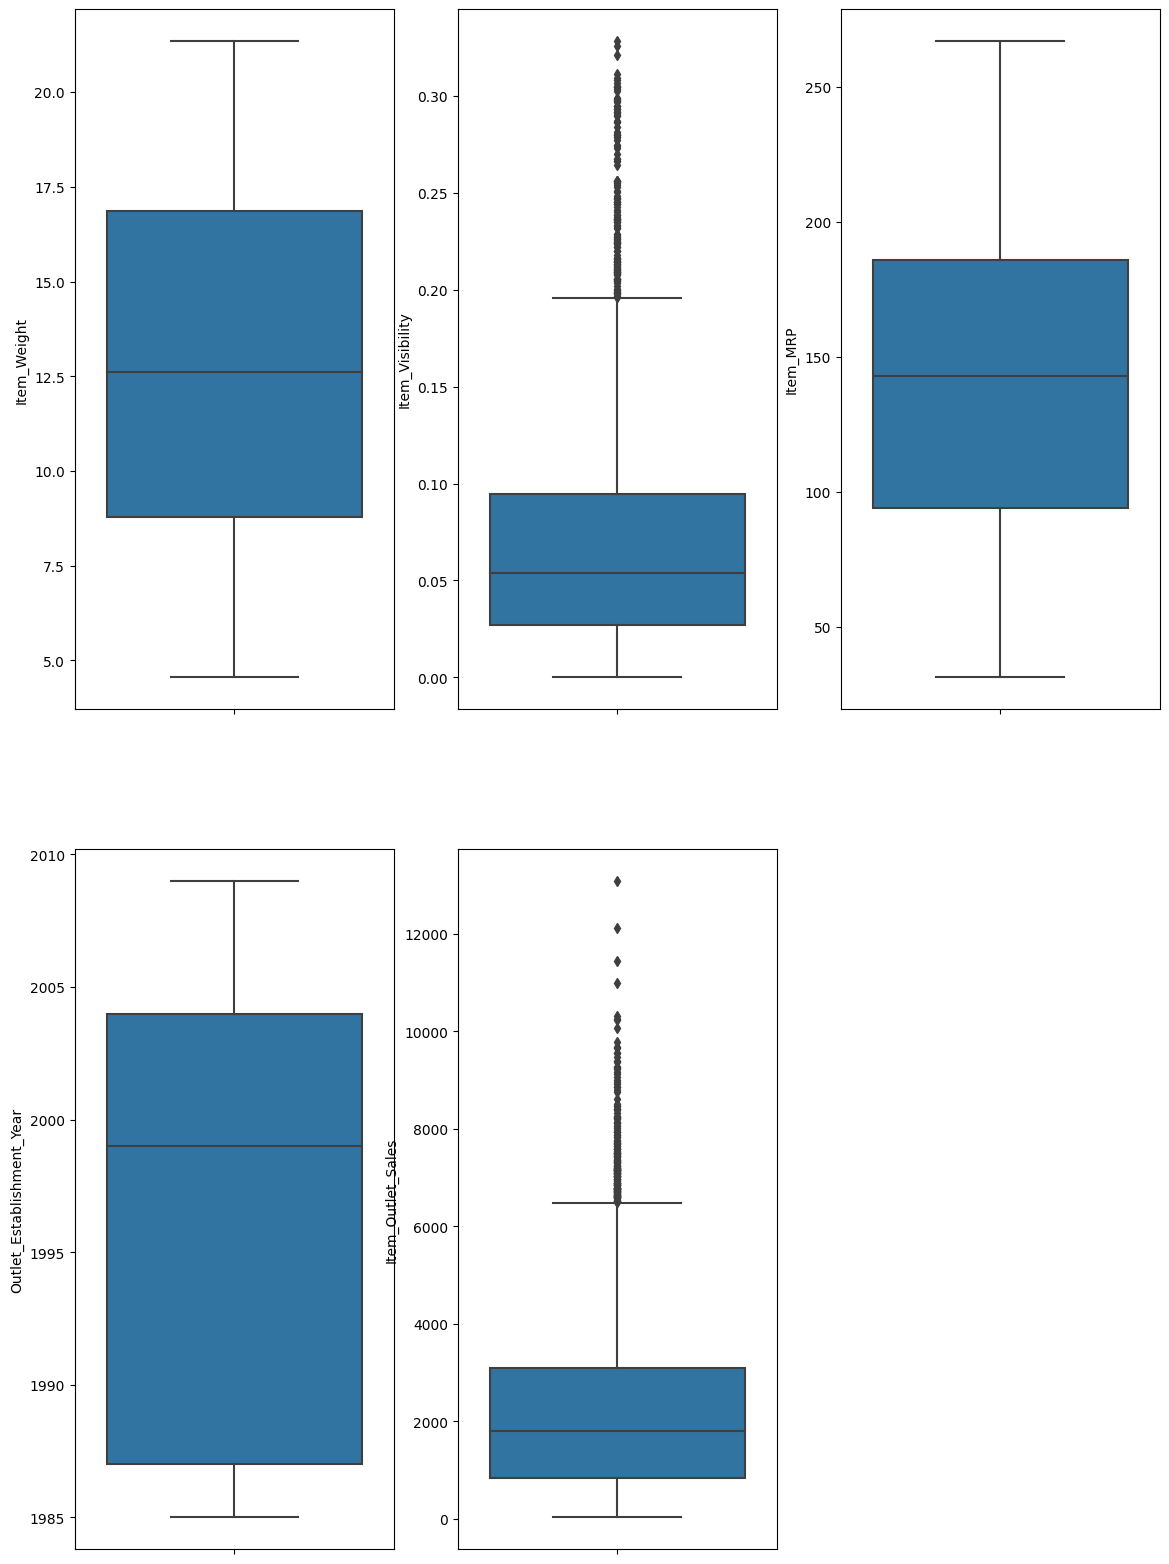

In [12]:
b_plot(num_col)

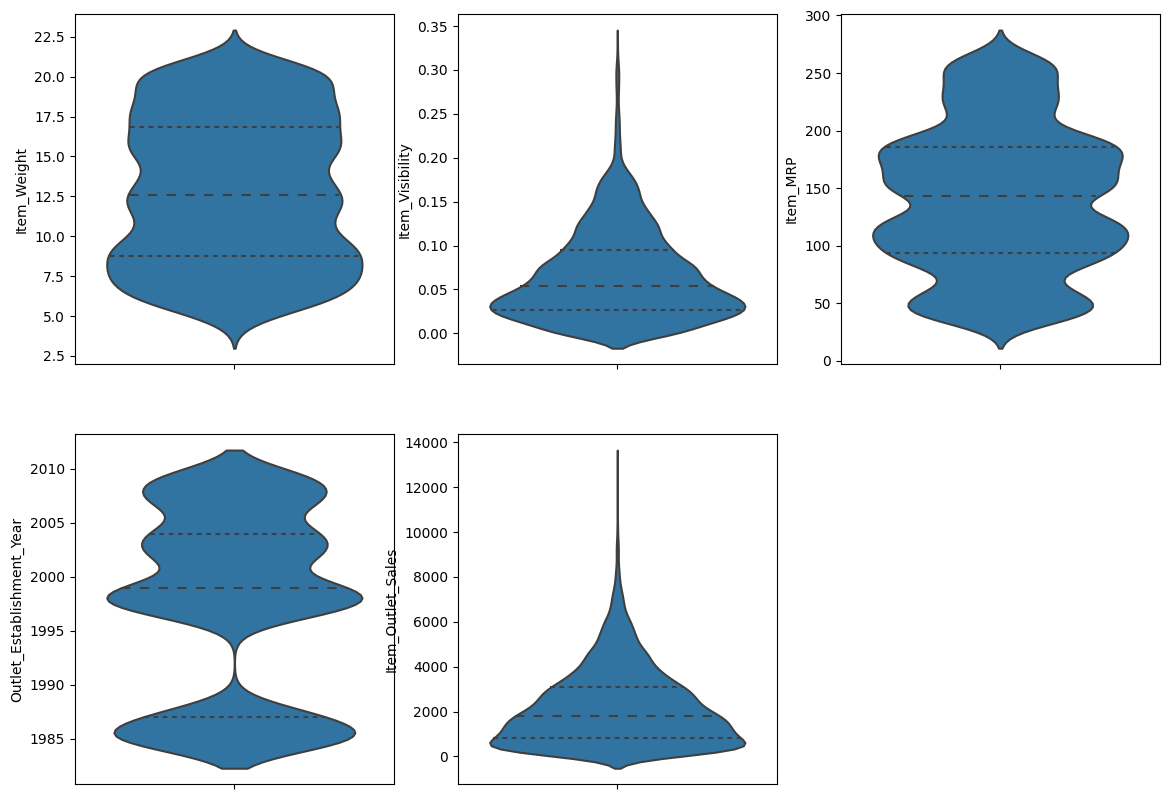

In [13]:
plt.figure(figsize=(14,10))
for loc,feature in enumerate(num_col):
    plt.subplot(2,3,loc+1)
    sns.violinplot(y=feature,data=df,inner='quartile')
plt.show()

In [14]:
cat_col=df.select_dtypes(include=['object']).columns.to_list()

In [15]:
cat_col.pop(0)
cat_col.pop(2)
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

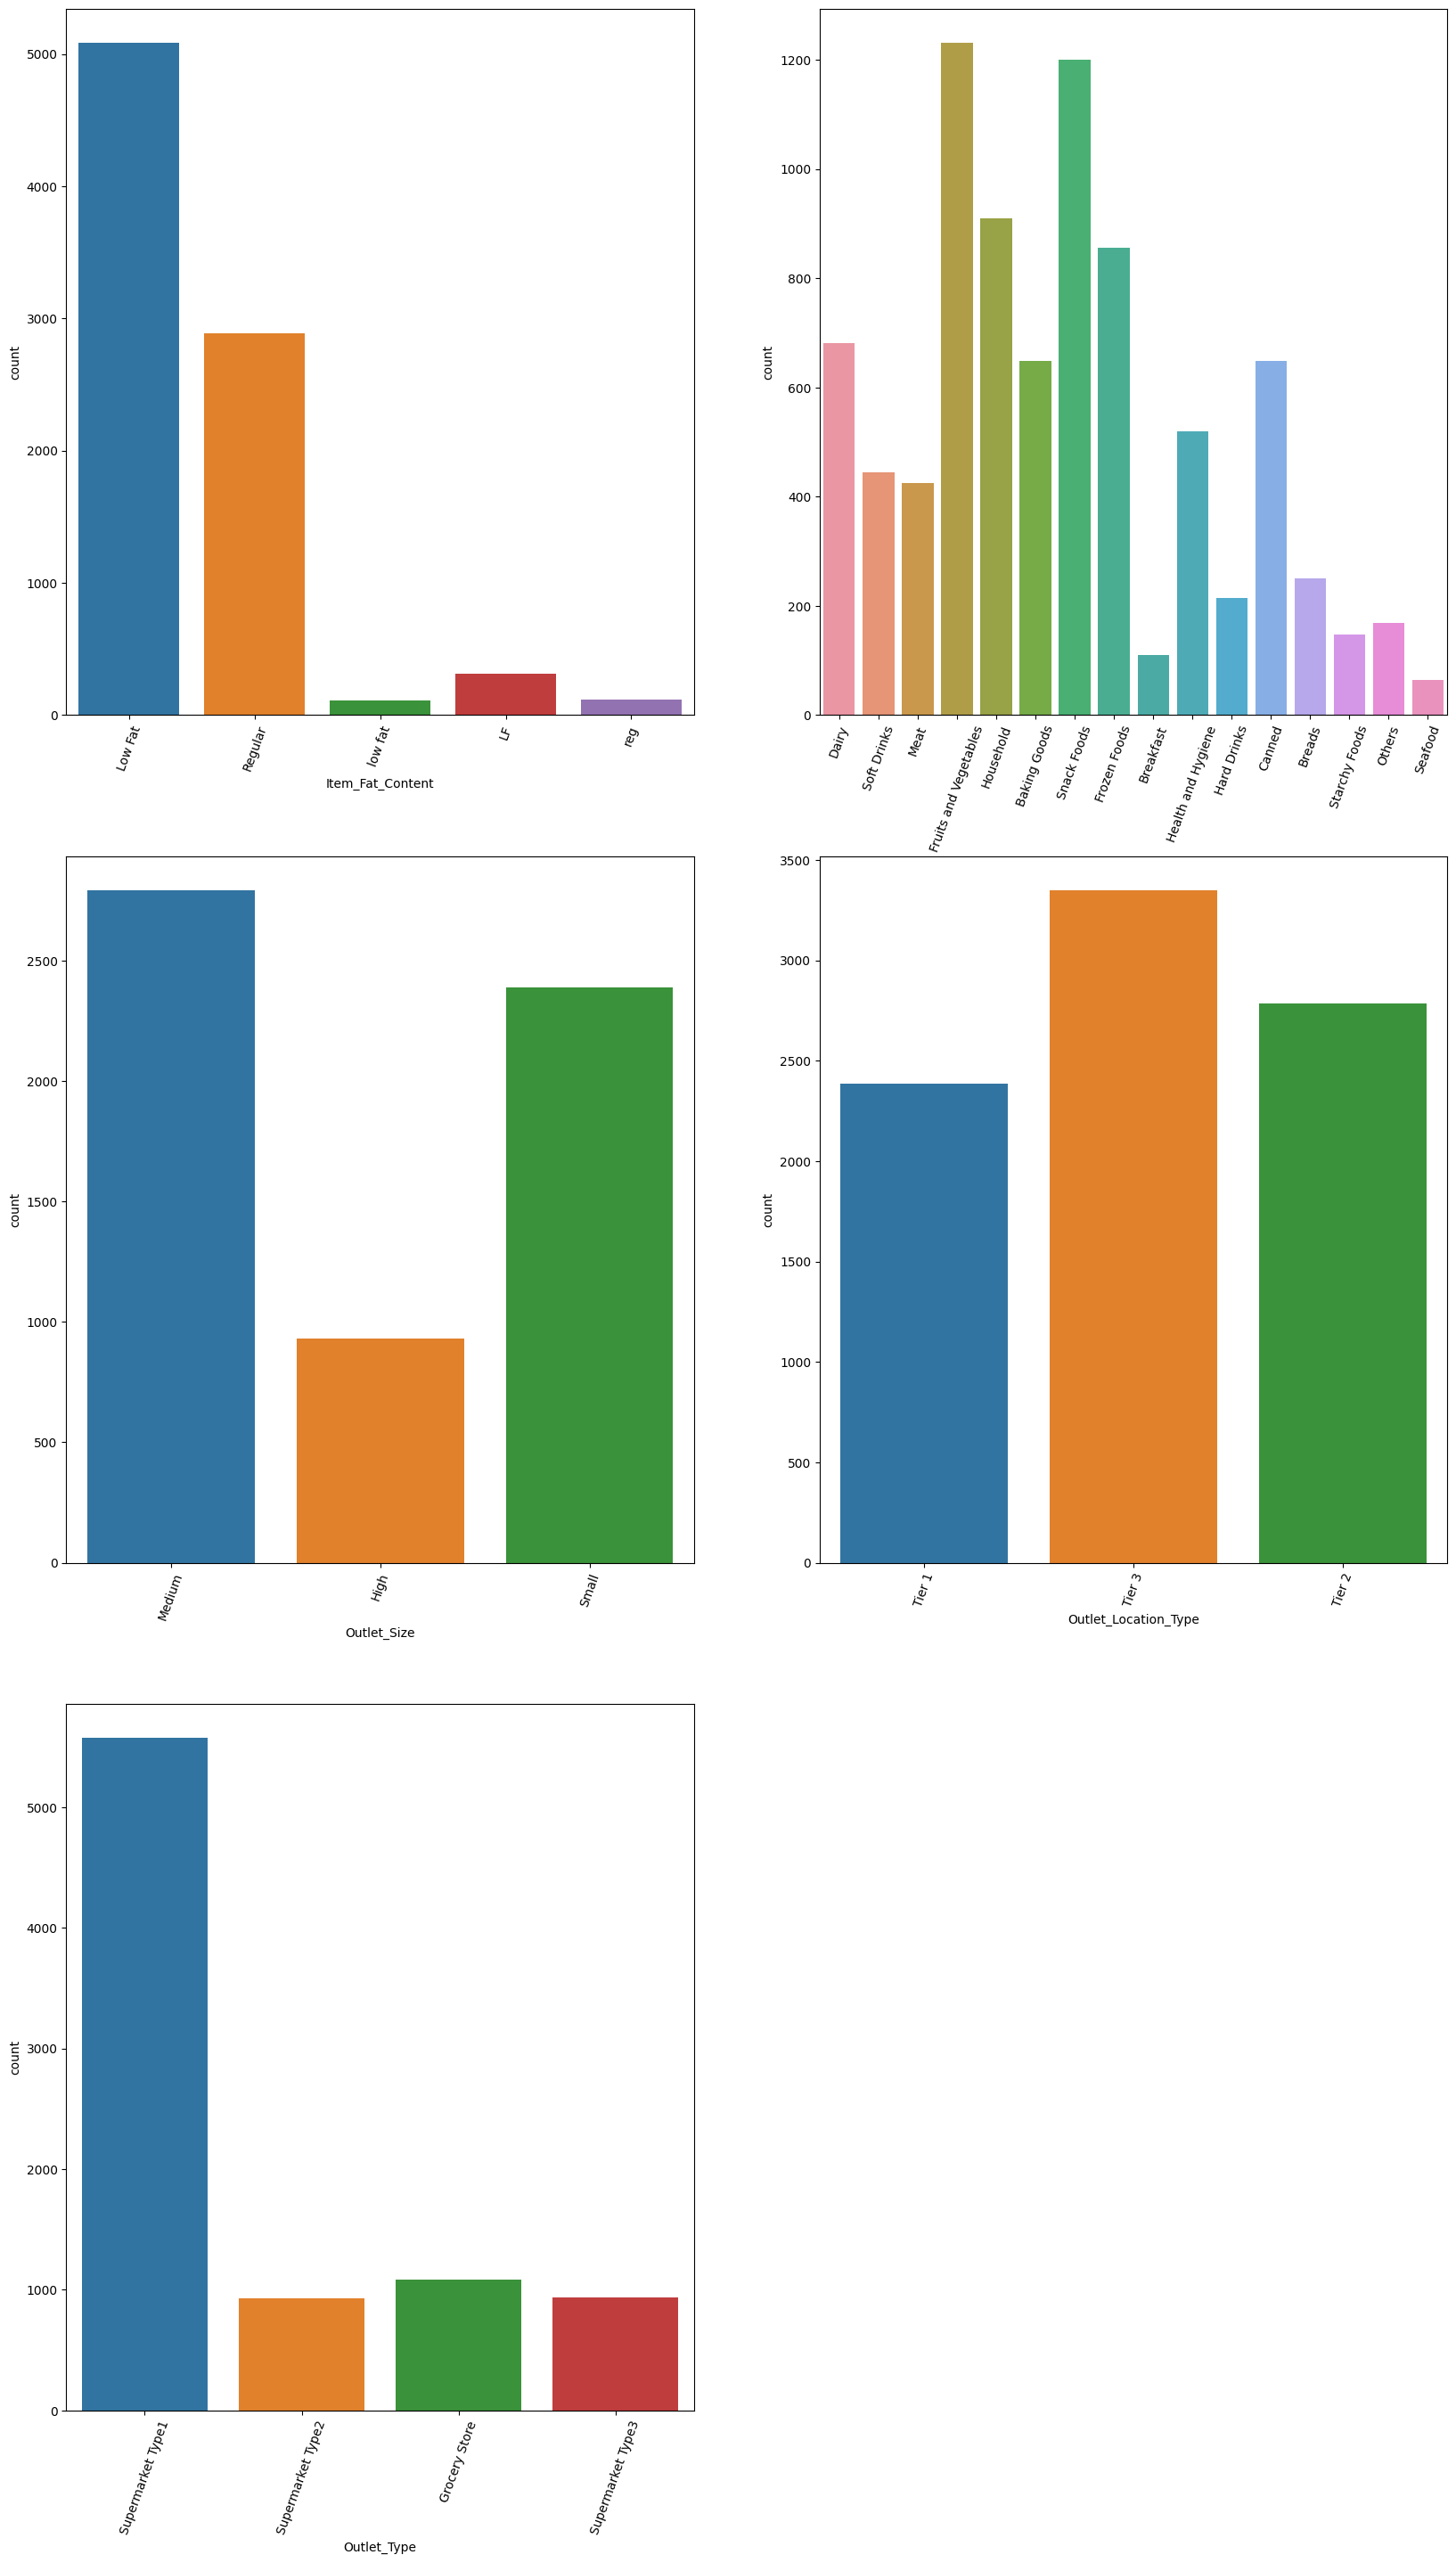

In [16]:
def cc_plot(features):
    plt.figure(figsize=(20,35))
    for loc,feature in enumerate(features):
        plt.subplot(3,2,loc+1)
        x=sns.countplot(x=feature,data=df)
        x.set_xticklabels(x.get_xticklabels(),rotation=70)
    plt.show()
cc_plot(cat_col)

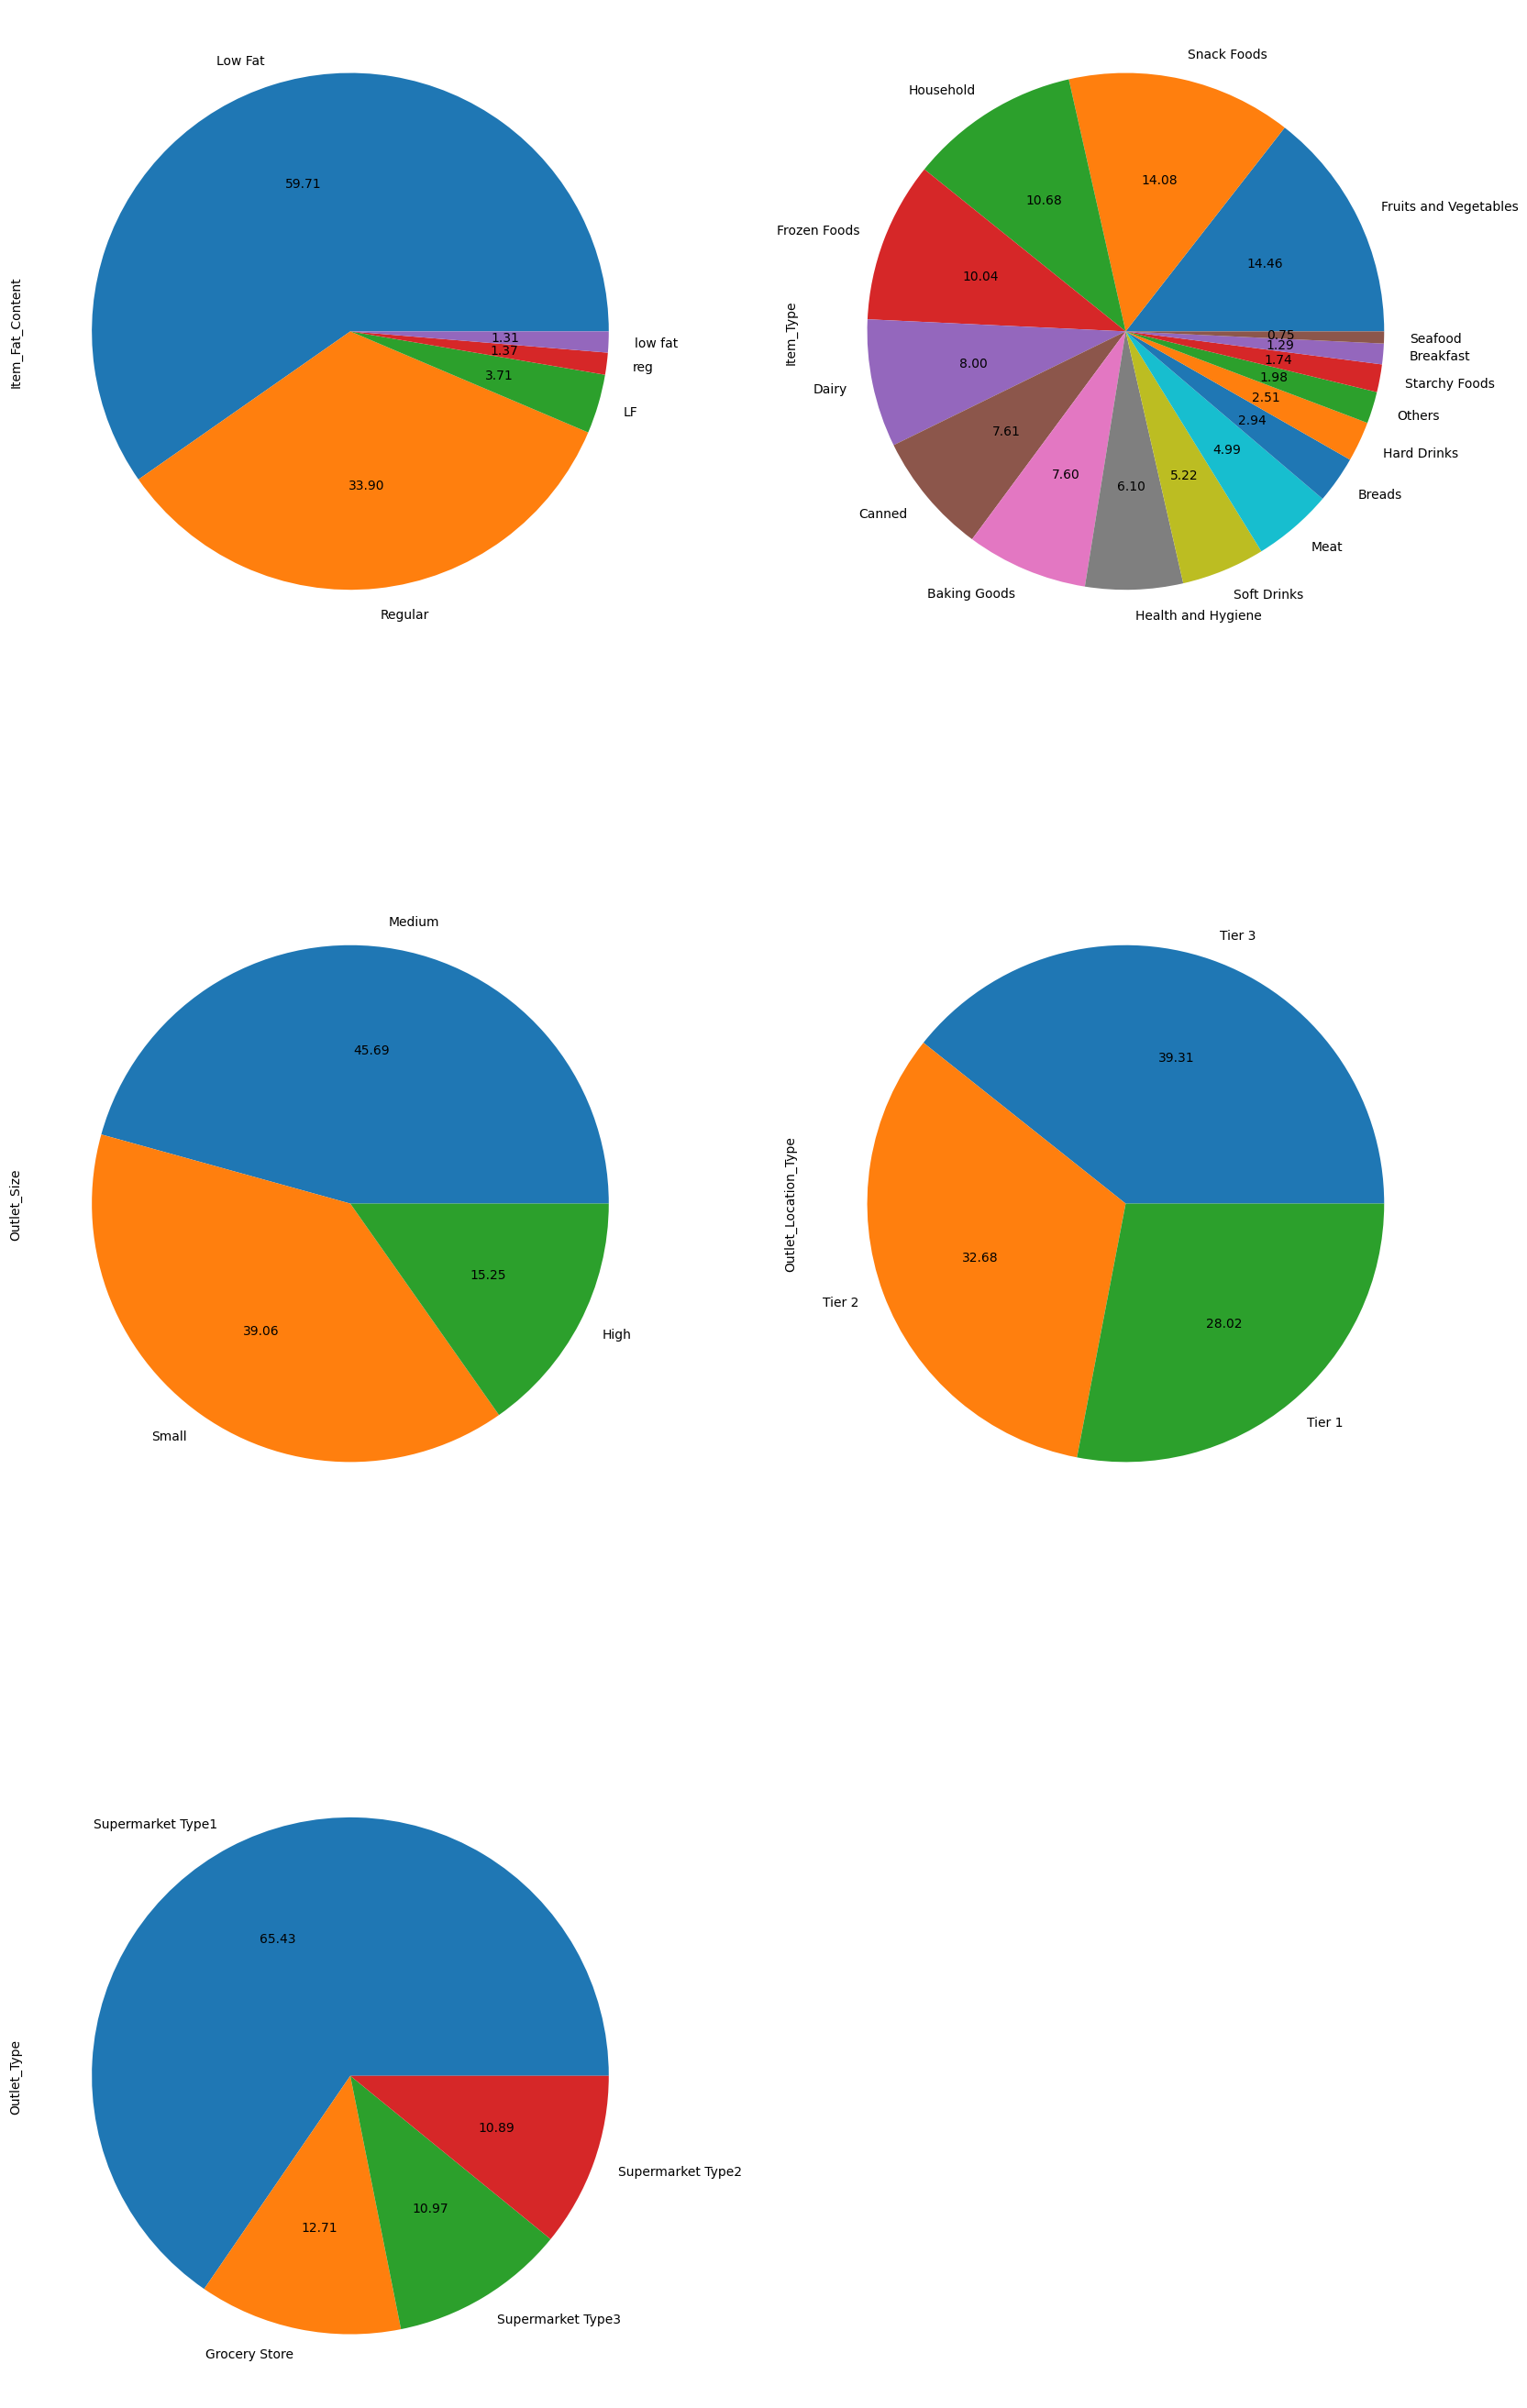

In [17]:
def p_plot(features):
    plt.figure(figsize=(20,35))
    for loc,feature in enumerate(features):
        plt.subplot(3,2,loc+1)
        df[feature].value_counts().plot(kind='pie',autopct="%.2f")
    plt.show()
p_plot(cat_col)

In [18]:
num_var2=['Item_Weight','Item_Visibility','Item_MRP']
def scat_plot(features,hue):
    plt.figure(figsize=(8,15))
    for loc,feature in enumerate(features):
        plt.subplot(3,1,loc+1)
        sns.scatterplot(x=feature,y='Item_Outlet_Sales',data=df,hue=hue)
    plt.show()

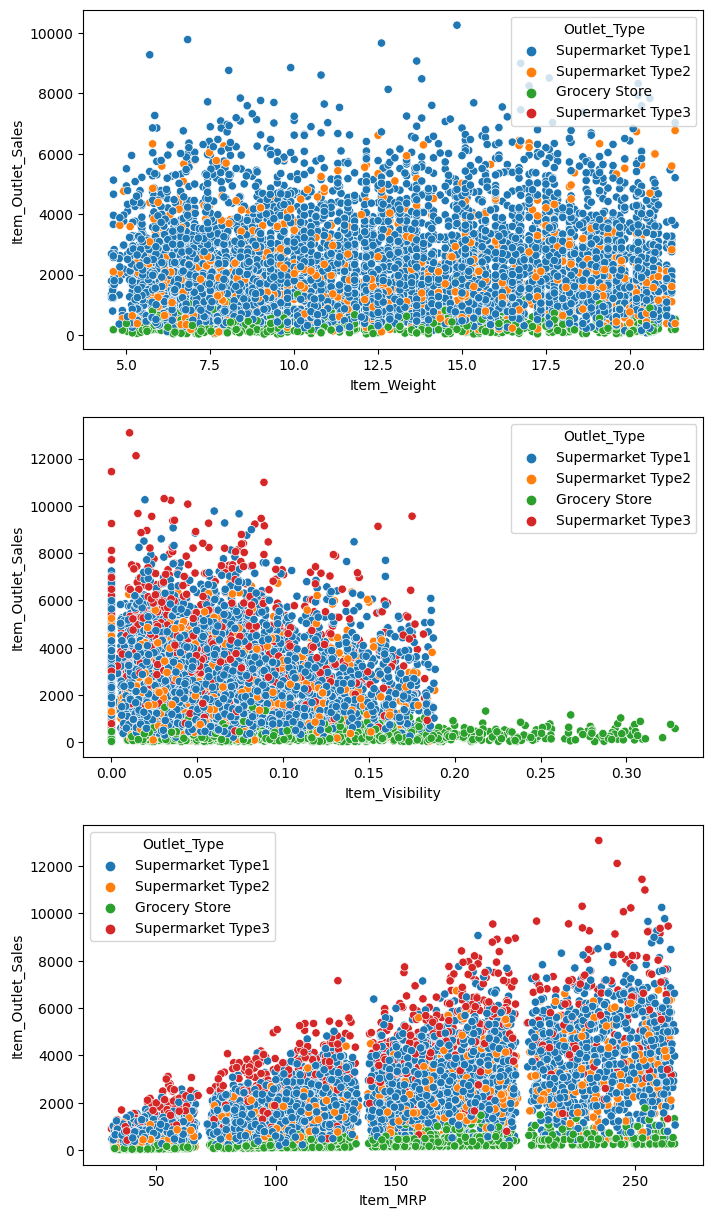

In [19]:
scat_plot(num_var2,'Outlet_Type')

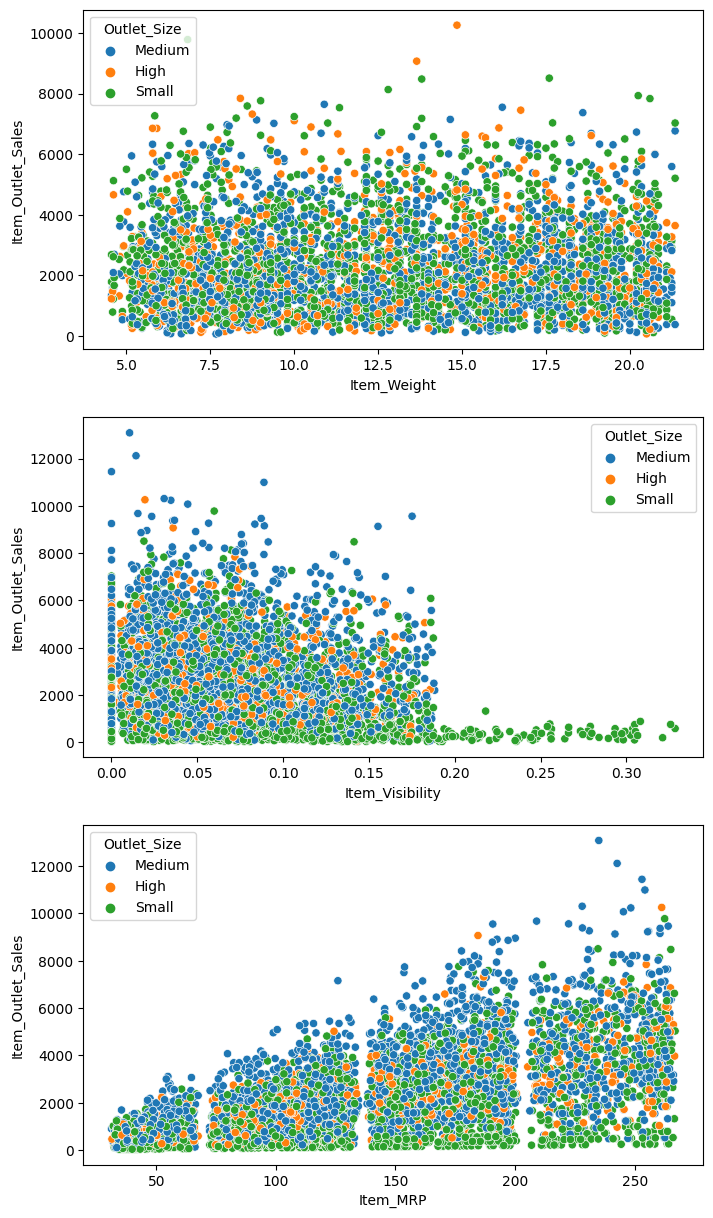

In [20]:
scat_plot(num_var2,'Outlet_Size')

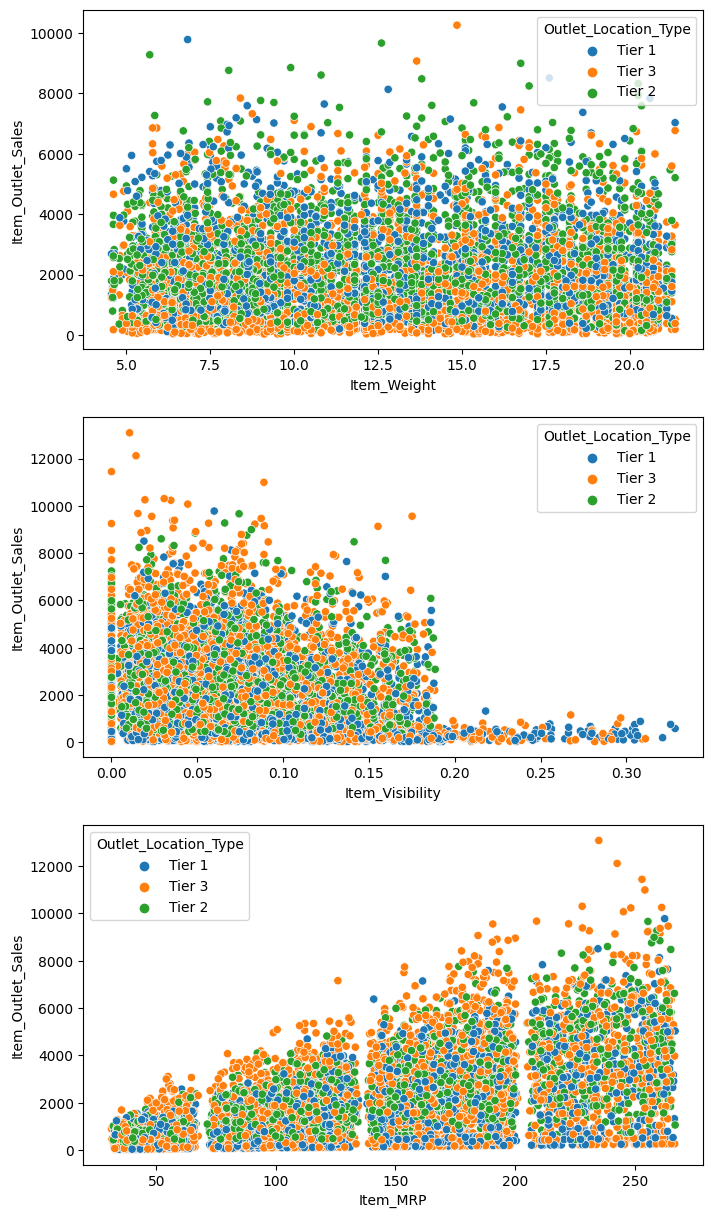

In [21]:
scat_plot(num_var2,'Outlet_Location_Type')

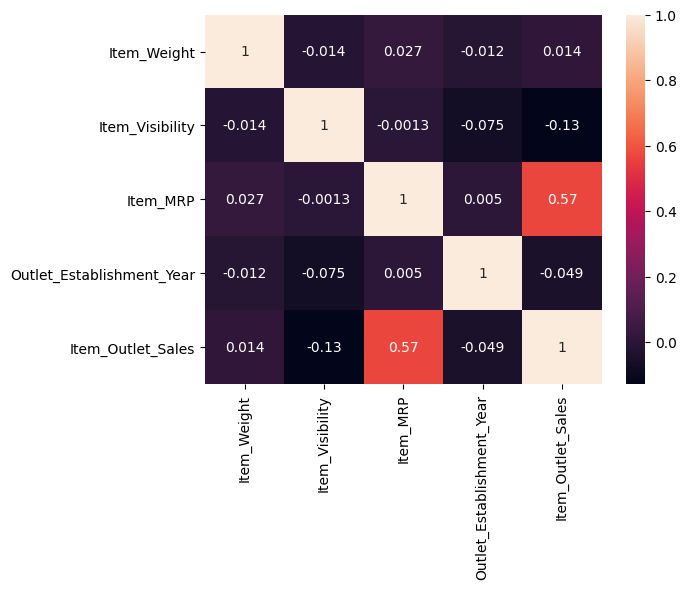

In [22]:
sns.heatmap(df[['Item_Weight',
                'Item_Visibility',
                'Item_MRP',
                'Outlet_Establishment_Year',
                'Item_Outlet_Sales']].corr(),annot=True)
plt.show()

## NULL Value Handling

In [23]:
df['Item_Weight']=df.Item_Weight.fillna(df.Item_Weight.mean())
df['Outlet_Size']=df.Outlet_Size.fillna(df.Outlet_Size.mode().iloc[0])

In [24]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

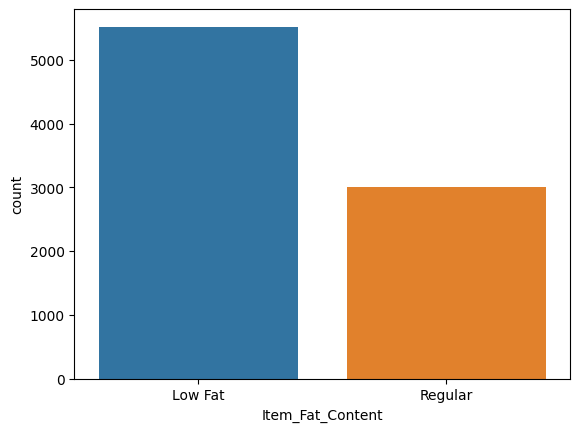

In [25]:
df['Item_Fat_Content']=df['Item_Fat_Content'].map({'Low Fat':'Low Fat',
                                                   'low fat':'Low Fat',
                                                   'LF':'Low Fat',
                                                   'Regular':'Regular',
                                                   'reg':'Regular'})
df['Item_Fat_Content']=df['Item_Fat_Content'].map({'Low Fat':'Low Fat',
                                                   'low fat':'Low Fat',
                                                   'LF':'Low Fat',
                                                   'Regular':'Regular',
                                                   'reg':'Regular'})
sns.countplot(x='Item_Fat_Content',data=df)

## Encoding Categorical Data Types

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
df.drop(columns=['Item_Identifier'],inplace=True)

In [28]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [29]:
X

array([[9.3, 'Low Fat', 0.016047301, ..., 'Medium', 'Tier 1',
        'Supermarket Type1'],
       [5.92, 'Regular', 0.019278216, ..., 'Medium', 'Tier 3',
        'Supermarket Type2'],
       [17.5, 'Low Fat', 0.016760075, ..., 'Medium', 'Tier 1',
        'Supermarket Type1'],
       ...,
       [10.6, 'Low Fat', 0.035186271, ..., 'Small', 'Tier 2',
        'Supermarket Type1'],
       [7.21, 'Regular', 0.145220646, ..., 'Medium', 'Tier 3',
        'Supermarket Type2'],
       [14.8, 'Low Fat', 0.04487828, ..., 'Small', 'Tier 1',
        'Supermarket Type1']], dtype=object)

In [30]:
y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [31]:
le_fat=LabelEncoder()
X[:,1]=le_fat.fit_transform(X[:,1])
for i in range(2):
    print(i,'->',le_fat.inverse_transform([i])[0])

0 -> Low Fat
1 -> Regular


In [32]:
le_osize=LabelEncoder()
X[:,7]=le_osize.fit_transform(X[:,7])
for i in range(3):
    print(i,'->',le_osize.inverse_transform([i])[0])

0 -> High
1 -> Medium
2 -> Small


In [33]:
le_oltype=LabelEncoder()
X[:,8]=le_oltype.fit_transform(X[:,8])
for i in range(3):
    print(i,'->',le_oltype.inverse_transform([i])[0])

0 -> Tier 1
1 -> Tier 2
2 -> Tier 3


In [34]:
le_otype=LabelEncoder()
X[:,9]=le_otype.fit_transform(X[:,9])
for i in range(4):
    print(i,'->',le_otype.inverse_transform([i])[0])

0 -> Grocery Store
1 -> Supermarket Type1
2 -> Supermarket Type2
3 -> Supermarket Type3


In [35]:
X

array([[9.3, 0, 0.016047301, ..., 1, 0, 1],
       [5.92, 1, 0.019278216, ..., 1, 2, 2],
       [17.5, 0, 0.016760075, ..., 1, 0, 1],
       ...,
       [10.6, 0, 0.035186271, ..., 2, 1, 1],
       [7.21, 1, 0.145220646, ..., 1, 2, 2],
       [14.8, 0, 0.04487828, ..., 2, 0, 1]], dtype=object)

In [36]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [37]:
le_oid=LabelEncoder()
X[:,5]=le_oid.fit_transform(X[:,5])
for i in range(10):
    print(i,'->',le_oid.inverse_transform([i])[0])

0 -> OUT010
1 -> OUT013
2 -> OUT017
3 -> OUT018
4 -> OUT019
5 -> OUT027
6 -> OUT035
7 -> OUT045
8 -> OUT046
9 -> OUT049


In [38]:
le_ptype=LabelEncoder()
X[:,3]=le_ptype.fit_transform(X[:,3])
for i in range(16):
    print(i,'->',le_ptype.inverse_transform([i])[0])

0 -> Baking Goods
1 -> Breads
2 -> Breakfast
3 -> Canned
4 -> Dairy
5 -> Frozen Foods
6 -> Fruits and Vegetables
7 -> Hard Drinks
8 -> Health and Hygiene
9 -> Household
10 -> Meat
11 -> Others
12 -> Seafood
13 -> Snack Foods
14 -> Soft Drinks
15 -> Starchy Foods


In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [41]:
X_train

array([[16.35, 0, 0.029565309, ..., 1, 2, 2],
       [15.25, 1, 0.0, ..., 1, 2, 2],
       [12.35, 1, 0.158715731, ..., 1, 0, 1],
       ...,
       [17.6, 0, 0.018943666, ..., 1, 1, 1],
       [20.35, 0, 0.054362695, ..., 1, 1, 1],
       [16.35, 0, 0.016993204, ..., 2, 0, 1]], dtype=object)

## LINEAR REGRESSION

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
from sklearn.model_selection import cross_val_score
accuracies1=cross_val_score(lr,X_train,y_train,cv=10)
print(accuracies1.mean()*100)
print(lr.score(X_train,y_train)*100)
print(lr.score(X_test,y_test)*100)

50.69028903946406
50.934563900106376
51.13306011955052


In [44]:
y_pred_linear=lr.predict(X_test)

In [45]:
print("RMSE --> ",mean_squared_error(y_test,y_pred_linear)**0.5)
print("R2 Score --> ",r2_score(y_test,y_pred_linear))

RMSE -->  1161.1321081374563
R2 Score -->  0.5113306011955052


## POLYNOMIAL REGRESSION

In [46]:
pf=PolynomialFeatures(degree=3)
X_poly=pf.fit_transform(X_train)

In [47]:
poly_reg=LinearRegression()
poly_reg.fit(X_poly,y_train)

LinearRegression()

In [48]:
accuracies1=cross_val_score(poly_reg,X_poly,y_train,cv=10)
print(accuracies1.mean()*100)
print(poly_reg.score(X_poly,y_train))
print(poly_reg.score(pf.transform(X_test),y_test))

59.14609686629504
0.614248287370158
0.6018631160889318


In [49]:
y_pred_poly=poly_reg.predict(pf.transform(X_test))

In [50]:
print("RMSE --> ",mean_squared_error(y_test,y_pred_poly)**0.5)
print("R2 Score --> ",r2_score(y_test,y_pred_poly))

RMSE -->  1048.0699500265962
R2 Score -->  0.6018631160889318


## LASSO REGRESSION

In [51]:
from sklearn.linear_model import Lasso

In [52]:
sc=StandardScaler()
X_scaled_train=sc.fit_transform(X_train)
X_scaled_test=sc.transform(X_test)

In [53]:
pf_2=PolynomialFeatures(degree=3)
X_poly_2=pf_2.fit_transform(X_scaled_train)

In [54]:
lasso_reg=Lasso(alpha=5,max_iter=2500)
lasso_reg.fit(X_poly_2,y_train)

Lasso(alpha=5, max_iter=2500)

In [55]:
accuracies2=cross_val_score(estimator=lasso_reg,X=X_poly_2,y=y_train,cv=10)
print(accuracies2.mean()*100)
print(lasso_reg.score(X_poly_2,y_train))
print(lasso_reg.score(pf_2.transform(X_scaled_test),y_test))

59.72624101357834
0.6117369921506024
0.6050328375208479


In [56]:
y_pred_lasso=lasso_reg.predict(pf_2.transform(X_scaled_test))

In [57]:
print("RMSE --> ",mean_squared_error(y_test,y_pred_lasso)**0.5)
print("R2 Score --> ",r2_score(y_test,y_pred_lasso))

RMSE -->  1043.8895682539517
R2 Score -->  0.6050328375208479


## RIDGE REGRESSION

In [58]:
from sklearn.linear_model import Ridge

In [59]:
ridge_reg=Ridge(alpha=7)
ridge_reg.fit(X_poly_2,y_train)

Ridge(alpha=7)

In [60]:
accuracies2=cross_val_score(estimator=ridge_reg,X=X_poly_2,y=y_train,cv=10)
print(accuracies2.mean()*100)
print(ridge_reg.score(X_poly_2,y_train))
print(ridge_reg.score(pf_2.transform(X_scaled_test),y_test))

59.15501485454027
0.6142474345090271
0.601886828236331


In [61]:
y_pred_ridge=ridge_reg.predict(pf_2.transform(X_scaled_test))

In [62]:
print("RMSE --> ",mean_squared_error(y_test,y_pred_ridge)**0.5)
print("R2 Score --> ",r2_score(y_test,y_pred_ridge))

RMSE -->  1048.038739204154
R2 Score -->  0.601886828236331
